# Pi with random number

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

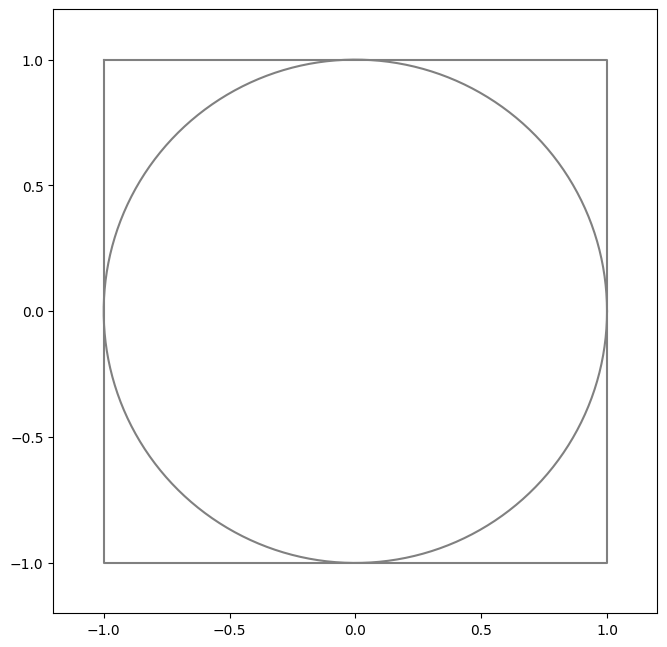

In [3]:
radius = 1.
angle = np.linspace(0, 2*np.pi, 180)  
x = radius*np.cos(angle) 
y = radius*np.sin(angle) 

fig, ax = plt.subplots(figsize=(8,8),dpi=100) 
ax.plot(x,y,color="grey") 
ax.plot([-1,1,1,-1,-1],[1,1,-1,-1,1],"-",color="grey")
ax.set_aspect(1) 
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
plt.show()

In [4]:
size = 10000

xr = np.random.uniform(-radius,radius,size)
yr = np.random.uniform(-radius,radius,size)
xrin = np.array([ x for x,y in zip(xr,yr) if np.sqrt(x**2+y**2)<=radius])
yrin = np.array([ y for x,y in zip(xr,yr) if np.sqrt(x**2+y**2)<=radius])

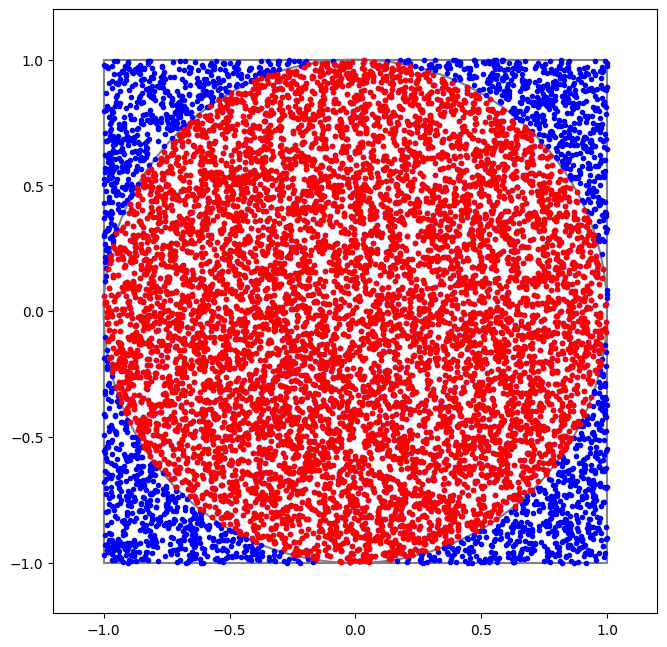

In [5]:
fig, ax = plt.subplots(figsize=(8,8),dpi=100) 
ax.plot(x,y,color="grey") 
ax.plot([-1,1,1,-1,-1],[1,1,-1,-1,1],"-",color="grey")
ax.set_aspect(1) 
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
ax.plot(xr,yr,".", color="blue")
ax.plot(xrin,yrin,".",color="red")
plt.show()

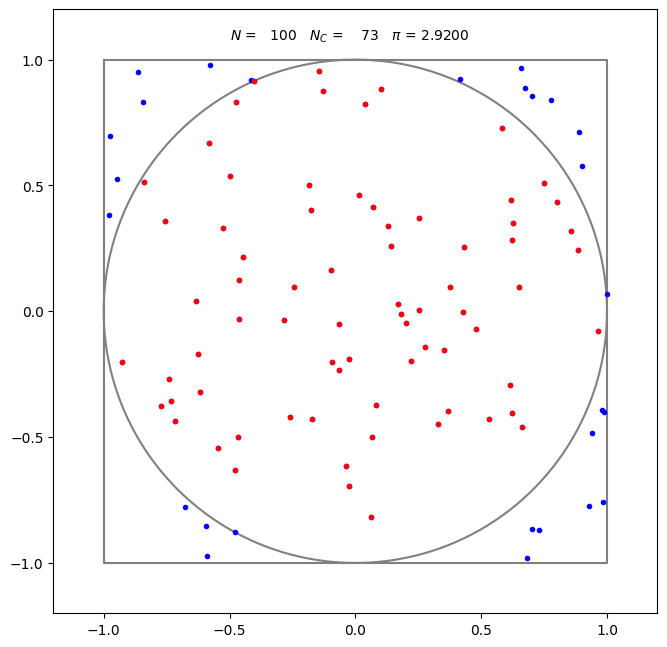

In [6]:
i = 100

fig, ax = plt.subplots(figsize=(8,8),dpi=100) 
ax.plot(x,y,color="grey") 
ax.plot([-1,1,1,-1,-1],[1,1,-1,-1,1],"-",color="grey")
ax.set_aspect(1) 
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])

xin = []
yin = []
for j in range(i):
    if np.sqrt(xr[j]**2+yr[j]**2)<=radius:
        xin.append(xr[j])
        yin.append(yr[j])

ax.plot(xr[:i],yr[:i],".", color="blue")
ax.plot(xin,yin,".", color="red")

pi = 4.*len(xin)/i
plt.text(-0.5,1.08, r'$N$ = {:5d}   $N_C$ = {:5d}   $\pi$ = {:5.4f}'.format(i,len(xin),pi))

plt.show()

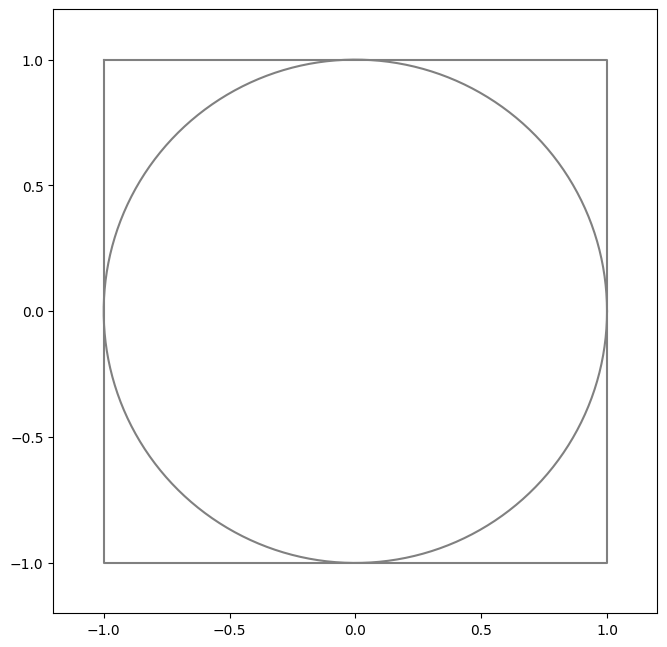

In [7]:
fig, ax = plt.subplots(figsize=(8,8),dpi=100) 
ax.plot(x,y,color="grey") 
ax.plot([-1,1,1,-1,-1],[1,1,-1,-1,1],"-",color="grey")
ax.set_aspect(1) 
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
pall, = ax.plot([],[],".", color="blue")
pin,  = ax.plot([],[],".", color="red")
text = plt.text(-0.5,1.08, '')
plt.show()

In [15]:
from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib inline
from IPython.display import HTML, Image

def pi_animate(i):
    xin = []
    yin = []
    for j in range(i):
        if np.sqrt(xr[j]**2+yr[j]**2)<radius:
            xin.append(xr[j])
            yin.append(yr[j])
    pall.set_data(xr[:i],yr[:i])
    pin.set_data(xin,yin)
    pi = 1.
    if i>0:
        pi = 4.*len(xin)/i
    text.set_text(r'$N$ = {:5d}   $N_C$ = {:5d}   $\pi$ = {:5.4f}'.format(i,len(xin),pi))
    return (pin,)

anim = FuncAnimation(fig,pi_animate,frames=range(200),blit=True)

In [14]:
HTML(anim.to_html5_video())

In [11]:
anim.save('pi.gif', writer='imagemagick', fps=20)

In [12]:
Image(url='pi.gif')